<a href="https://colab.research.google.com/github/Ahmed-Sohail2000/Titanic-Project/blob/main/Titanic_Project_%F0%9F%9A%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An End-To-End Machine Learning Project


## Problem Definition

The project is to predict which passengers suvived the Titanic Shipwreck. The challenge is to build a predictive model that answers the question: `What sorts of people were more likely to survive?` using passenger data, etc.

* The overview of the 🚢 Titanic Project can be found here: https://www.kaggle.com/competitions/titanic/overview

## Data

The data has been split into 2 groups:

* Training set (train.csv)
* Test set (test.csv)

**Training Set:** Should only be used in building machine learning models. For the training set, the outcome (ground truth) is provided for each passenger and your model will be based on `features` like gender and class. Feature engineering can also be used to create new features.

**Test Set:** Should only be used to see how well your model performs on unseen data. The ground truth for each passenger is not given as it is your job to predict each passenger using the model you trained to determine whether or not they survived the sinking of the titanic.

* The project data section can be found here: https://www.kaggle.com/competitions/titanic/data


## Evaluation

**Goal**

To predict if a passenger survived the sinking of the titanic ship or not. For each in the test set, you must predict a 0 or 1 value for the variable.

**Metric**

Your score is the percentage of passengers you correctly predict. This is known as `accuracy`.

**Submission**

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

* The file should have exactly 2 columns:

1) PassengerId (sorted in any order)
2) Survived (contains your binary predictions: 1 for survived, 0 for deceased)

**Example**
* PassengerId,Survived
* 892,0
* 893,1
* 894,0
* Etc.

## Features

**Data Dictionary**

`Variable`	  `Definition`         `Key`
1) survival	   Survival	        0 = No, 1 = Yes
2) pclass	   Ticket class	    1 = 1st, 2 = 2nd, 3 = 3rd
3) sex	          Sex
4) Age	        Age in years
5) sibsp	   # of siblings / spouses aboard the Titanic
6) parch	   # of parents / children aboard the Titanic
7) ticket	   Ticket number
8) fare	       Passenger fare
9) cabin	   Cabin number
10) embarked   Port of Embarkation	    C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**

`pclass:` A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

`age:` Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`sibsp:` The dataset defines family relations in this way...
`Sibling` = brother, sister, stepbrother, stepsister
`Spouse` = husband, wife (mistresses and fiancés were ignored)

`parch:` The dataset defines family relations in this way...
`Parent` = mother, father
`Child` = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


## Modelling

## Experiments

## Save & Load


## 1.0 Preparing our Tools


In [1]:
# First let's import the basic tools to get start with the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

# Scikit-Learn Data Modelling/Processing Tools
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# sklearn Model/Algorithm Tools
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# sklearn prediction tools
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# sklearn evaluation tools
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Classification Model Evaluation tools
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

# Scikit-Learn Evaluation Metrics for Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hyperparameter tuning tools
from sklearn.model_selection import GridSearchCV

## 2.0 Getting Our Data Ready

In [3]:
# Now import the train.csv
passenger_data_train_df = pd.read_csv('https://raw.githubusercontent.com/Ahmed-Sohail2000/Titanic-Project/main/Data/train.csv')

# Import the test.csv
passenger_data_test_df = pd.read_csv('https://raw.githubusercontent.com/Ahmed-Sohail2000/Titanic-Project/main/Data/test.csv')

In [4]:
# View the training data
passenger_data_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2.1 Data Exploratory Analysis (DEA)

We are now going to perform analysis on the data to understand the characteristics and features of the passengers. To see whether our data contains missing values and what dtypes it is.


In [5]:
# Get the data info and its description
passenger_data_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
passenger_data_train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Find out if there are any missing values and what type of data it is
passenger_data_train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As you can see, the `Age` and the `Cabin` columns contain missing values.

In [8]:
passenger_data_train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
passenger_data_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
passenger_data_train_df.shape

(891, 12)

In [11]:
passenger_data_test_df.isna().sum(), passenger_data_test_df.dtypes

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64,
 PassengerId      int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object)

In [12]:
passenger_data_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2.2 Data Visualization

We are now going to see graphs or charts of certain features and make comparisons wherever relevant information it is suitable to make to have a better understanding and relations between each other.

In [13]:
passenger_data_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.2.1 Passengers Survived

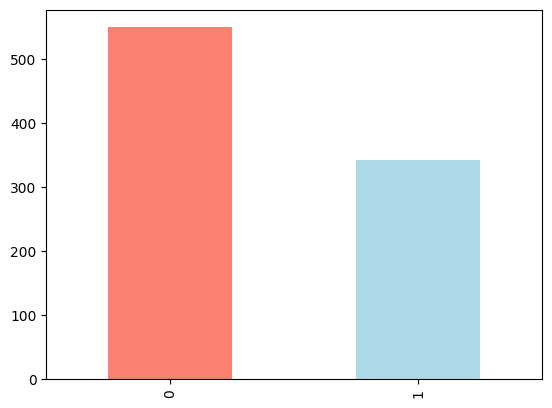

In [14]:
# Make a bar graph to see how many passenger have survived
passenger_data_train_df['Survived'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

This shows that around 600 passengers have not survived and around 350 have survived.

### 2.2.2 Passengers Sex and their Age

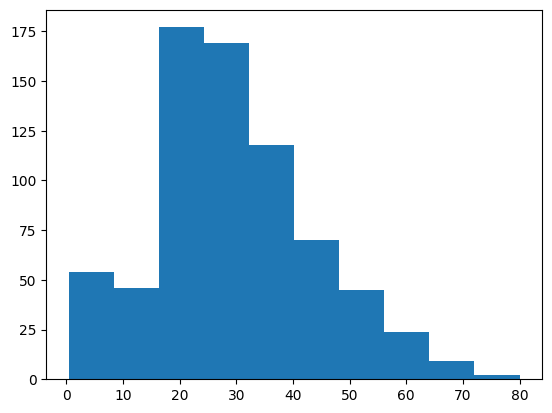

In [15]:
# Check the age groups of the passengers
plt.hist(passenger_data_train_df['Age']);

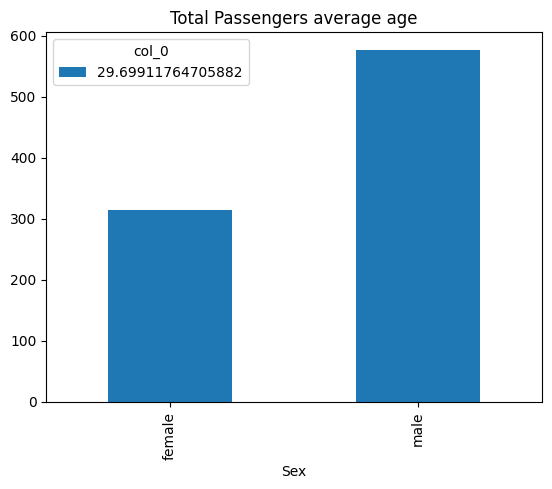

In [16]:
# Compare the ages with the genders
pd.crosstab(passenger_data_train_df['Sex'], passenger_data_train_df['Age'].mean()).plot(kind = 'bar',
                                                                      title = 'Total Passengers average age');

### 2.2.3 Cross-Check Passengers Sex and Survived

In [17]:
# Total number of males and females
passenger_data_train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

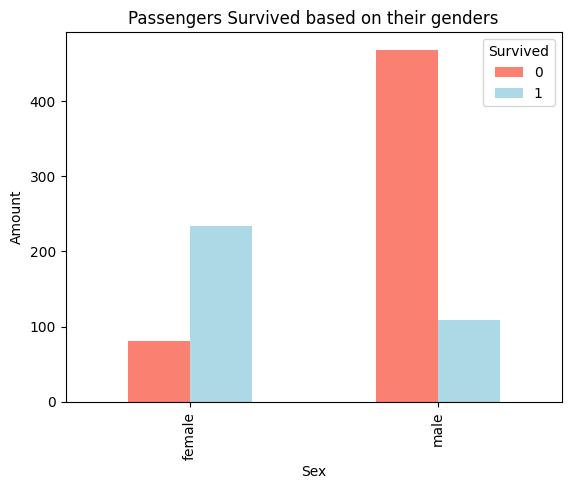

In [18]:
# Plot a cross tab to check how many males/females have survived using the bar function
crosstab = pd.crosstab(passenger_data_train_df['Sex'], passenger_data_train_df['Survived']).plot(kind = 'bar',
                                                                    xlabel = 'Sex',
                                                                    ylabel = 'Amount',
                                                                    title = 'Passengers Survived based on their genders',
                                                                    color = ['Salmon', 'lightblue']);

There are around 250 females survived compared to under 100 and around 500 males that have not suvived as opposed to 100 men. This means that more females have survived the sinking of the titanic ship compared to the males. Males have died more than the females.

### 2.2.4 Passengers Siblings/Spouse and Parents with/without Children vs Survival

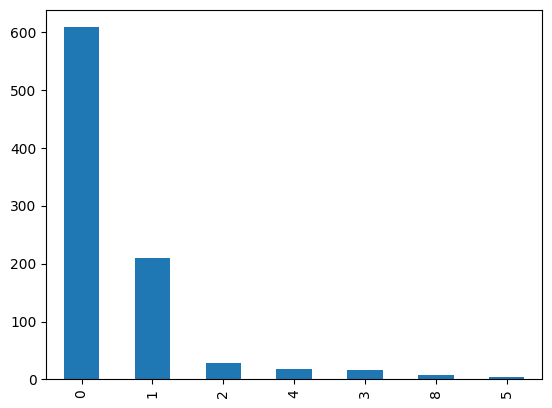

In [19]:
passenger_data_train_df['SibSp'].value_counts().plot(kind = 'bar');

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1311: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:521: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


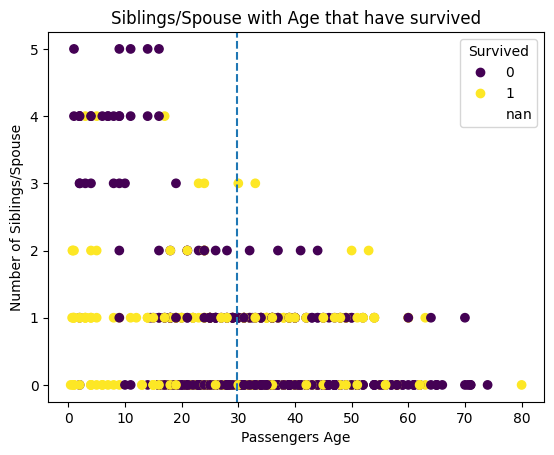

In [20]:
# Parch with Sibsp and survived
fig, ax = plt.subplots();

scatter = ax.scatter(x = passenger_data_train_df['Age'],
           y = passenger_data_train_df['SibSp'],
           c = passenger_data_train_df['Survived']);
ax.set(title = 'Siblings/Spouse with Age that have survived',
       xlabel = 'Passengers Age',
       ylabel = 'Number of Siblings/Spouse');

ax.legend(*scatter.legend_elements(), title = 'Survived');


ax.axvline(passenger_data_train_df['Age'].mean(),
           linestyle = '--');

In [21]:
# Check how many parents/children there are
passenger_data_train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [22]:
# How many siblings/spouse there are
passenger_data_train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### 2.2.4 Passengers Embarked Port with Survived

In [23]:
passenger_data_train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

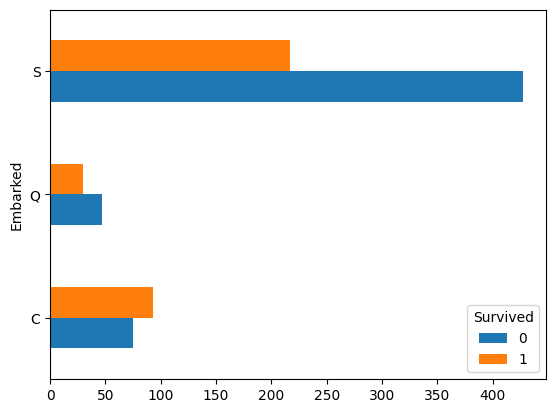

In [24]:
# Horizontal bar graph of passenger boarding the ship from different ports
pd.crosstab(passenger_data_train_df['Embarked'], passenger_data_train_df['Survived']).plot(kind = 'barh');

### 2.2.5 Putting it all in one figure

<ipython-input-25-ad553f0f9c7a>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


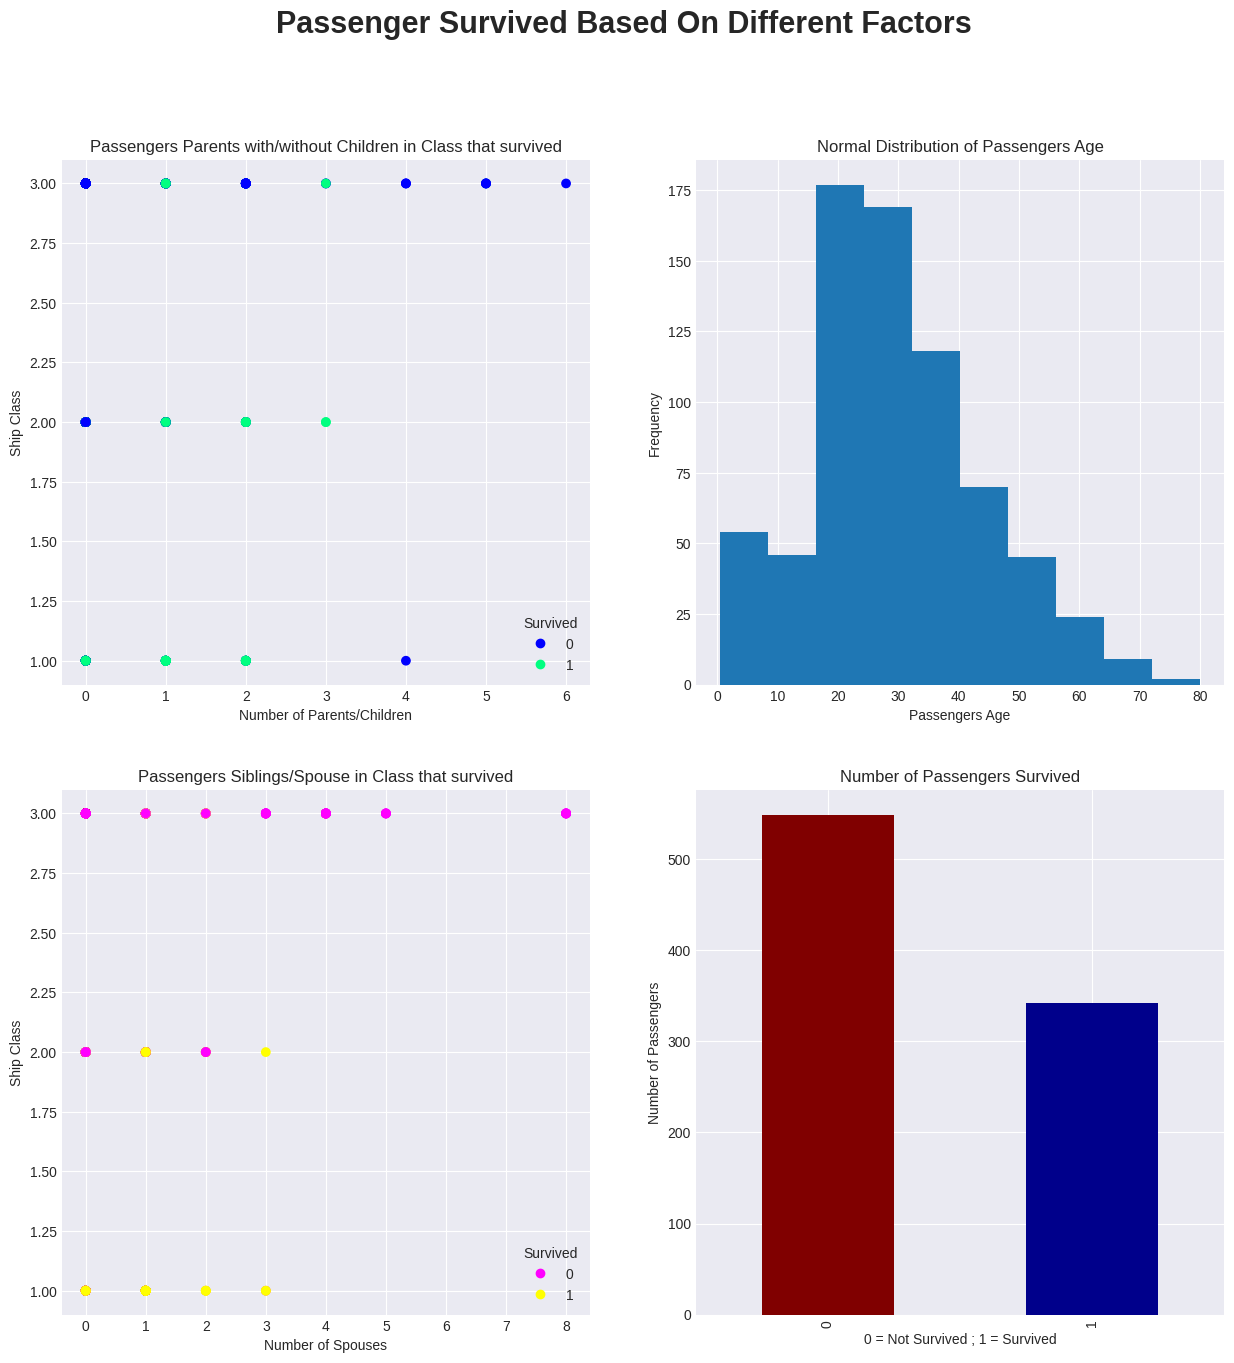

In [25]:
# Now we are going to plot all the important feature comparisons made in one figure to present the data of the passenger.

# Figure color style
plt.style.use('seaborn-darkgrid')

# Setting the figtures
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows = 2,
                                            ncols = 2,
                                            figsize = (15,15));

# Plot 1: Number of Passengers Survived
ax4 = passenger_data_train_df['Survived'].value_counts().plot(kind = 'bar', color = ['maroon', 'darkblue'])
# Customize plot 1
ax4.set(title = 'Number of Passengers Survived',
        xlabel = '0 = Not Survived ; 1 = Survived',
        ylabel = 'Number of Passengers');

# Plot 2: Passengers relation to the Age
hist = ax2.hist(passenger_data_train_df['Age'],
                bins = 10);
# Customize Plot 2
ax2.set(title = 'Normal Distribution of Passengers Age',
        xlabel = 'Passengers Age',
        ylabel = 'Frequency');

# Plot 3: Number of Passengers Siblings/spouse with Ship Class that survived
scatter = ax3.scatter(x = passenger_data_train_df['SibSp'],
                      y = passenger_data_train_df['Pclass'],
                      c = passenger_data_train_df['Survived'],
                      cmap =  'spring');

# Customize the plot
ax3.set(title = 'Passengers Siblings/Spouse in Class that survived',
        xlabel = 'Number of Spouses',
        ylabel = 'Ship Class');

# Add a legend
ax3.legend(*scatter.legend_elements(), title = 'Survived');

# Plot 4:
scatter = ax1.scatter(x = passenger_data_train_df['Parch'],
            y = passenger_data_train_df['Pclass'],
            c = passenger_data_train_df['Survived'],
            cmap = 'winter');

# Customize the plot
ax1.set(title = 'Passengers Parents with/without Children in Class that survived',
        xlabel = 'Number of Parents/Children',
        ylabel = 'Ship Class');

# Add a legend
ax1.legend(*scatter.legend_elements(), title = 'Survived');

# Main Title
fig.suptitle('Passenger Survived Based On Different Factors',
             fontsize = 22,
             fontweight = 'bold',
             horizontalalignment = 'center');

## 2.3 Correlation Matrix

We are going to build a correlation matrix that will show the feature relationships and compare it with the `Survived` label. This is not going to be accurate because there are some missing values and the feature data types are object (string), so the relations between each features in comparison to the `survived` label will not give a better insight or analysis.

<ipython-input-26-c8c6b4e27e9c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = passenger_data_train_df.corr();


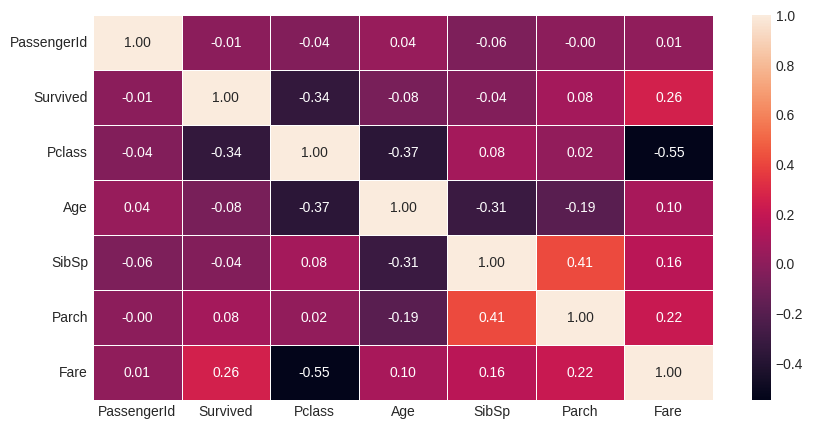

In [26]:
# Create a figure
fig, ax = plt.subplots(figsize = (10,5));

# Create a correlation matrix.
corr_matrix = passenger_data_train_df.corr();

ax = sns.heatmap(corr_matrix,
                 linewidths = 0.5,
                 fmt = '.2f',
                 cbar = True,
                 annot = True);

## 2.4 Data Transformation (Pre-Processing)

We are going to clean, transform the data because it contains `missing values` and that the type of data in some features is `object` and so the following steps to perform these operations are:

1) Drop the missing values of the features that are small in the training and test data.
2) Fill the missing values (impute) in the training and test data.
3) Split into X and y (features and labels). Split the training data into train and val.
4) Convert the Non-numerical features into numerical features.


### 2.4.1 Make a copy

Make a copy of the passenger data to avoid any mistakes or errors that can ruin the data of the passengers.

In [27]:
# Make a copy of the training and test data
passenger_data_train_df_copy = passenger_data_train_df.copy()
passenger_data_test_df_copy = passenger_data_test_df.copy()

passenger_data_train_df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# View the test data copy
passenger_data_test_df_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
# Check how many missing and the type of values in the training data copy
passenger_data_train_df_copy.isna().sum(), passenger_data_train_df_copy.dtypes

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object)

In [30]:
# Check how many missing and the type of values in the test data copy
passenger_data_test_df_copy.isna().sum(), passenger_data_test_df_copy.dtypes

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64,
 PassengerId      int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object)

### 2.4.2 Split into Features and Labels (X & y)


In [31]:
# Split the training feature and label
X = passenger_data_train_df_copy.drop('Survived', axis = 1)
y = passenger_data_train_df_copy['Survived']

X.head(), y.head()

(   PassengerId  Pclass                                               Name  \
 0            1       3                            Braund, Mr. Owen Harris   
 1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2            3       3                             Heikkinen, Miss. Laina   
 3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4            5       3                           Allen, Mr. William Henry   
 
       Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
 0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
 1  female  38.0      1      0          PC 17599  71.2833   C85        C  
 2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
 3  female  35.0      1      0            113803  53.1000  C123        S  
 4    male  35.0      0      0            373450   8.0500   NaN        S  ,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

In [32]:
X.shape, y.shape

((891, 11), (891,))

In [33]:
# Check the missing values
X.isna().sum(), passenger_data_test_df_copy.isna().sum()

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

### 2.4.3 Data Filling (Imputing)

Fill the missing values with the respective values using SimpleImputer on the X feature and the testing data.

In [34]:
# Impute the missing values
age_imp = SimpleImputer(strategy = 'median')
cab_imp = SimpleImputer(strategy = 'constant', fill_value = 'missing')

# Define the features
num_feat = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_feat = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Imputer function
imputer = ColumnTransformer([
    ('age_imp', age_imp, num_feat),
    ('cab_imp', cab_imp, cat_feat)
])

# Fit and transform the training data
filled_data_train = imputer.fit_transform(X)

# Transform on the test data
filled_data_test = imputer.transform(passenger_data_test_df_copy)

# Convert into a dataframe
filled_passenger_data_train_df_copy = pd.DataFrame(filled_data_train, columns= X.columns)

filled_passenger_data_test_df_copy = pd.DataFrame(filled_data_test, columns = X.columns)

# Check
filled_passenger_data_train_df_copy.isna().sum(), filled_passenger_data_test_df_copy.isna().sum()

(PassengerId    0
 Pclass         0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 Name           0
 Sex            0
 Ticket         0
 Cabin          0
 Embarked       0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 Name           0
 Sex            0
 Ticket         0
 Cabin          0
 Embarked       0
 dtype: int64)

### 2.4.4 One Hot Encoding Non-Numerical Features into Numerical

Using OneHotEncoder function on the X features and the test data

In [86]:
# Data encoding
one_hot = OneHotEncoder(handle_unknown = 'ignore')

# Define the categories
categorical_features = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Transformer
transformer = ColumnTransformer([
    ('one_hot', one_hot, categorical_features)
], remainder = 'passthrough')

# fit and transform the training data
transformed_passenger_data_train_df_copy = transformer.fit_transform(filled_passenger_data_train_df_copy)

# transform the test
transformed_passenger_data_test_df_copy = transformer.transform(filled_passenger_data_test_df_copy)

# Check
transformed_passenger_data_train_df_copy.toarray(), transformed_passenger_data_test_df_copy.toarray()

(array([[ 0.    ,  0.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
        [ 0.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 71.2833],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
        ...,
        [ 0.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    , 30.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]]),
 array([[ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.8292],
        [ 0.    ,  0.    ,  0.    , ...,  1.    ,  0.    ,  7.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  9.6875],
        ...,
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.25  ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  8.05  ],
        [ 0.    ,  0.    ,  0.    , ...,  1.    ,  1.    , 22.3583]]))

In [96]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Define the numerical and categorical features
numerical_features = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Create a ColumnTransformer for one-hot encoding and normalization
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
normalized_passenger_data_train = pipeline.fit_transform(filled_passenger_data_train_df_copy)

# Transform the test data
normalized_passenger_data_test = pipeline.transform(filled_passenger_data_test_df_copy)

# Convert the sparse matrices to dense arrays}
normalized_passenger_data_train = normalized_passenger_data_train.toarray()
normalized_passenger_data_test = normalized_passenger_data_test.toarray()

# Check the normalized arrays
print("Normalized Training Data:")
print(normalized_passenger_data_train)

print("\nNormalized Test Data:")
print(normalized_passenger_data_test)

Normalized Training Data:
[[-1.73010796  0.82737724 -0.56573646 ...  0.          1.
   0.        ]
 [-1.72622007 -1.56610693  0.66386103 ...  0.          0.
   0.        ]
 [-1.72233219  0.82737724 -0.25833709 ...  0.          1.
   0.        ]
 ...
 [ 1.72233219  0.82737724 -0.1046374  ...  0.          1.
   0.        ]
 [ 1.72622007 -1.56610693 -0.25833709 ...  0.          0.
   0.        ]
 [ 1.73010796  0.82737724  0.20276197 ...  1.          0.
   0.        ]]

Normalized Test Data:
[[ 1.73399584  0.82737724  0.39488658 ...  1.          0.
   0.        ]
 [ 1.73788372  0.82737724  1.35550962 ...  0.          1.
   0.        ]
 [ 1.74177161 -0.36936484  2.50825727 ...  1.          0.
   0.        ]
 ...
 [ 3.34746731  0.82737724  0.70228595 ...  0.          1.
   0.        ]
 [ 3.35135519  0.82737724 -0.1046374  ...  0.          1.
   0.        ]
 [ 3.35524307  0.82737724 -0.1046374  ...  0.          0.
   0.        ]]


### 2.4.5 Splitting the Data into Training and Validation Splits

This is important to split the data into X and y so that whenever we implement a machine learning model/algorithm, the training and test data splits will be different and not contain data leakages/biases.

In [97]:
# Check the shape of the feature and label
X.head(), X.shape

(   PassengerId  Pclass                                               Name  \
 0            1       3                            Braund, Mr. Owen Harris   
 1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2            3       3                             Heikkinen, Miss. Laina   
 3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4            5       3                           Allen, Mr. William Henry   
 
       Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
 0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
 1  female  38.0      1      0          PC 17599  71.2833   C85        C  
 2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
 3  female  35.0      1      0            113803  53.1000  C123        S  
 4    male  35.0      0      0            373450   8.0500   NaN        S  ,
 (891, 11))

In [98]:
y.head(), y.shape

(0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64,
 (891,))

In [99]:
# Training split (80%), Validation split (20%)

# Training and Test split
X_train, X_val, y_train, y_val = train_test_split(normalized_passenger_data_train,
                                                  y,
                                                  test_size = 0.20, # val split = 20%, training = 80%
                                                  random_state = 42) # shuffled the data into the pseudo generated number
# Check the training and validation data shape
(X_train.shape, y_train.shape), (X_val.shape, y_val.shape)

(((712, 1732), (712,)), ((179, 1732), (179,)))

## 3.0 Adding a Machine Learning Model

The project is to classfiy whether the passenger has survived or not from the sinking of the ship. Since it is a classification problem, there are 3 ML Models in the Classification category that can be used to check which model will give a better score.

* Roadmap to choose which algorithm is best: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 3.1 Linear SVC Model/Algorithm

In [100]:
# Model is imported in the first section.

# Instantiate
clf_svc = LinearSVC(random_state=42)

# Fit the classifier to the training data
clf_svc.fit(X_train, y_train)

# Score the classifier model to the validation data
clf_svc_score = clf_svc.score(X_val, y_val)
clf_svc_score

0.8324022346368715

### 3.2 KNeighbors Classifier Model

In [101]:
# Model is already imported

# Setup random seed
np.random.seed(42)

# Instantiate the model
clf_KNN = KNeighborsClassifier()

# Fit the model to the training data
clf_KNN.fit(X_train, y_train)

# Score the model to the validation data
clf_KNN_score = clf_KNN.score(X_val, y_val)
clf_KNN_score

0.8044692737430168

### 3.3 Random Forest Classifier Model

In [102]:
# Model is already imported

# Instantiate the mode
clf = RandomForestClassifier(random_state = 42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Score the model to the valid data
clf_score = clf.score(X_val, y_val)
clf_score

0.8100558659217877

In [42]:
clf.score(X_train, y_train)

1.0

### 3.4 Model Comparisons

We are now going to compare the different scores of the model to each other and visualize it

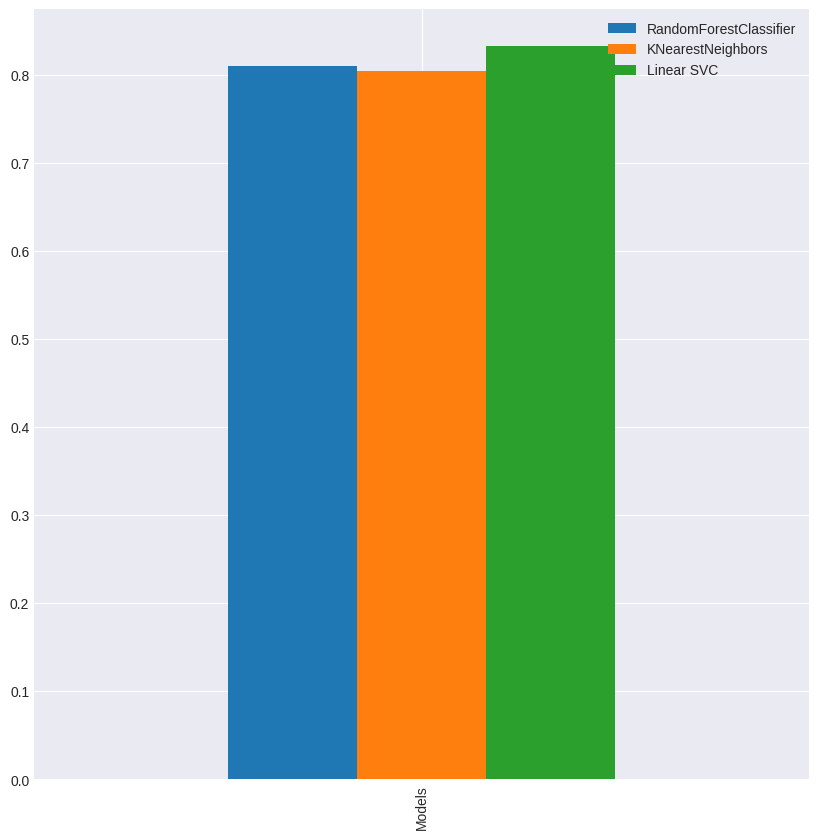

In [103]:
model_comparison = pd.DataFrame({
    'RandomForestClassifier' : clf_score,
    'KNearestNeighbors' : clf_KNN_score,
    'Linear SVC' : clf_svc_score
}, index = ['Models'])

model_comparison.plot.bar(figsize = (10,10));

As shown above, the `RandomForestClassifier()` performs better than `KNN()` while `LinearSVC()` is first and `KNN()` is last. The next step is to improve the `LinearSVC` model and score it again so that we will see how the model has improved.

## 4.0 Make predictions using a machine learning model

* The predictions are made on the `X_val` data so that you can compare it with the `y_val` data and generally there are 2 ways you can make predictions:
1) `predict()` method
2) `predict_proba()` method

So in order to make those predictions we will need `accuracy_score()` and `mean_absolute_error()` which will be imported in the first section.

The machine learning model/estimator will be `LinearSVC()`

### 4.1 Using Predict Method

In [111]:
# First lets instantiate prediction
y_val_preds = clf_svc.predict(X_val)
y_val_preds

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1])

#### Accuracy Score

In [112]:
acc_score = accuracy_score(y_val, y_val_preds)
acc_score

0.8324022346368715

#### Mean Absolute Error

In [113]:
# This is for regression problem
mae = mean_absolute_error(y_val, y_val_preds)
mae

0.16759776536312848

### 4.2 Using Predict_Proba Method

In [114]:
# Lets instantiate
y_val_pred_proba = clf.predict_proba(X_val)
y_val_pred_proba

# Convert into a DataFrame
# Predicted probabilities that whether the passenger survived or not will be a float value.
predicted_probabilities = pd.DataFrame(y_val_pred_proba, columns = ['Not Survived', 'Survived'])
predicted_probabilities[:10]

,Not Survived,Survived
0,0.78,0.22
1,0.97,0.03
2,0.98,0.02
3,0.11,0.89
4,0.39,0.61
5,0.15,0.85
6,0.31,0.69
7,0.95,0.05
8,0.42,0.58
9,0.18,0.82


## 5.0 🧪 Evaluating a machine learning model

* There are generally 3 ways to perform the evaluation of a machine learning model:
1) Using the estimator's (model) built-in `score()` method.
2) Using the `scoring()` parameter.
3) Problem specific metric functions.

* The resource link can be found here:https://scikit-learn.org/stable/modules/model_evaluation.html

### 5.1 Using `score()` method

In [116]:
# Model is imported in the first section.

# Instantiate
clf_svc = LinearSVC(random_state=42)

# Fit the classifier to the training data
clf_svc.fit(X_train, y_train)

# Score the classifier model to the validation data
clf_svc_score = clf_svc.score(X_val, y_val)
clf_svc_score

0.8324022346368715

The built-in `score()` method is generally the same as the `accuracy_score()` method

### 5.2 Using the `Scoring()` Parameter

The scoring parameter is done by using tools such as `cross_val_score()` and `GridSearchCV()`.

* The resource link for that is found below

1) **Cross Val Score:** https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

2) **GridSearchCV:** https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

There are other metrics that can be implemented in the `cross_val_score()` and `GridSearchCV()` parameter to improve and control what metric it is applied to the estimator.

* The resource link can be found here: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

#### Cross Val Score

* Scoring = None (by default, it will be the estimators/models built-in score() method)

In [117]:
# Model is imported in the first section.

# Instantiate
clf_svc = LinearSVC(random_state=42)

# Fit the classifier to the training data
clf_svc.fit(X_train, y_train)

# Score the classifier model to the validation data
clf_svc_score = clf_svc.score(X_val, y_val)
clf_svc_score

0.8324022346368715

In [118]:
# Cross Val Score
scores = cross_val_score(clf_svc,
                         X = X_train,
                         y = y_train,
                         cv = 5)

# check the scores
scores

array([0.81118881, 0.82517483, 0.82394366, 0.77464789, 0.83098592])

In [119]:
# Compare single score with the mean of the cross val score
clf_svc_single_score = clf_svc.score(X_val, y_val)

# Mean of the cross val score
clf_svc_cross_val_score = np.mean(cross_val_score(clf_svc, X = X_train, y = y_train, cv = 5))

# Compare the two
clf_svc_single_score, clf_svc_cross_val_score

(0.8324022346368715, 0.8131882202304738)

In [121]:
# Scoring parameter set to None
cross_val_score(clf_svc,
                X = X_train,
                y = y_train,
                cv = 5,
                scoring = None)

array([0.81118881, 0.82517483, 0.82394366, 0.77464789, 0.83098592])

### 5.2.1 Classification Model Evaluation Metrics

1) Accuracy
2) Classification Report
3) Confusion Matrix/ Confusion Matrix Display
4) Area Under ROC Curve

#### Accuracy

In [124]:
# Model is imported in the first section.

# Instantiate
clf_svc = LinearSVC(random_state=42)

# Fit the classifier to the training data
clf_svc.fit(X_train, y_train)

# Cross val score
acc = np.mean(cross_val_score(clf_svc,
                              X = X_train,
                              y = y_train,
                              cv = 5))

print(f'Titanic Sinking Ship Survived Cross-Validated Accuracy is:{acc * 100 :.2f}%')

Titanic Sinking Ship Survived Cross-Validated Accuracy is:81.32%


#### Classification Report


In [125]:
# Model is imported in the first section.

# Instantiate
clf_svc = LinearSVC(random_state=42)

# Fit the classifier to the training data
clf_svc.fit(X_train, y_train)

# Make the y_val_preds
y_val_preds = clf_svc.predict(X_val)

In [126]:
# Already imported the class metrics with method/function classification report
class_report = classification_report(y_val, y_val_preds)

print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [127]:
# Convert into a DataFrame
pd.DataFrame(classification_report(y_val, y_val_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.837838,0.823529,0.832402,0.830684,0.831923
recall,0.885714,0.756757,0.832402,0.821236,0.832402
f1-score,0.861111,0.788732,0.832402,0.824922,0.831189
support,105.000000,74.000000,0.832402,179.000000,179.000000


#### Confusion Matrix/ Confusion Matrix Display

The confusion matrix resource link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix


The confusion matrix display is made from the scikit-learn newer versions (+1.0) and there are of two types:
1) `from_estimator()`
2) `from_predictions()`

The resources for both of these classes are found here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

In [128]:
# Already imported confusion matrix class
conf_matrix = confusion_matrix(y_val, y_val_preds)
conf_matrix

array([[93, 12],
       [18, 56]])

Let's put it in cross-tab

In [129]:
pd.crosstab(y_val, y_val_preds, rownames = ['True Label'], colnames = ['Predicted Label'])

Predicted Label,0,1
True Label,,
0,93,12
1,18,56


#### Confusion Matrix Display

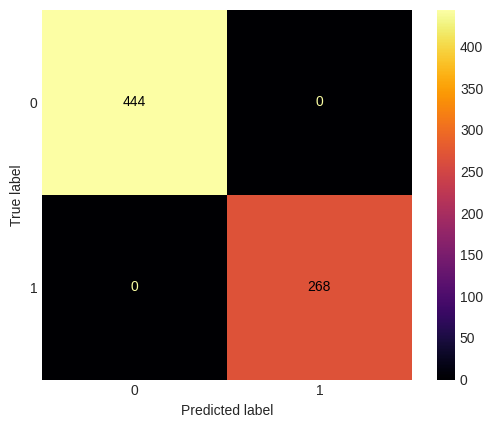

In [130]:
# From estimator
conf_matrix_est = ConfusionMatrixDisplay.from_estimator(clf,
                                                        X = X_train,
                                                        y = y_train,
                                                        values_format = 'd',
                                                        cmap = 'inferno');
plt.grid(False)

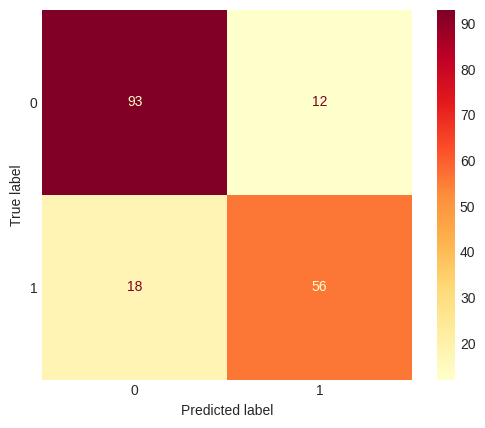

In [131]:
# From predictions
conf_matrix_preds = ConfusionMatrixDisplay.from_predictions(y_val, y_val_preds, cmap = 'YlOrRd', colorbar = True)
plt.grid(False)

#### Area Under Receiving Operating Characteristics (AUC/ROC) Curve

* Area Under Curve (AUC)
* ROC Curve

ROC Curve are comparisons of a model's true positive rate (tpr) vs a model's false positive rate (fpr)

* True Positive = Model predicts 1 when Truth is 1
* False Positive = Model predicts 1 when Truth is 0
* True Negative = Model predicts 0 when Truth is 0
* False Negative = Model predicts 0 when Truth is 1

In [133]:
# Pick the first column array
y_val_probs_positive = y_val_probs[:, 1]
y_val_probs_positive[:10]

array([0.213, 0.03 , 0.04 , 0.869, 0.555, 0.886, 0.731, 0.055, 0.703,
       0.838])

In [134]:
# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs_positive)

# Check false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00952381, 0.00952381, 0.01904762, 0.01904762,
       0.02857143, 0.02857143, 0.03809524, 0.03809524, 0.03809524,
       0.03809524, 0.03809524, 0.03809524, 0.05714286, 0.05714286,
       0.07619048, 0.07619048, 0.08571429, 0.08571429, 0.1047619 ,
       0.1047619 , 0.11428571, 0.11428571, 0.12380952, 0.12380952,
       0.13333333, 0.13333333, 0.17142857, 0.17142857, 0.2       ,
       0.2       , 0.21904762, 0.21904762, 0.22857143, 0.22857143,
       0.23809524, 0.23809524, 0.24761905, 0.25714286, 0.27619048,
       0.2952381 , 0.3047619 , 0.31428571, 0.31428571, 0.36190476,
       0.36190476, 0.37142857, 0.37142857, 0.38095238, 0.41904762,
       0.46666667, 0.5047619 , 0.53333333, 0.57142857, 0.6       ,
       0.61904762, 0.62857143, 0.63809524, 0.66666667, 0.68571429,
       0.71428571, 0.73333333, 0.77142857, 0.78095238, 0.80952381,
       0.84761905, 0.88571429, 0.8952381 , 0.92380952, 0.94285

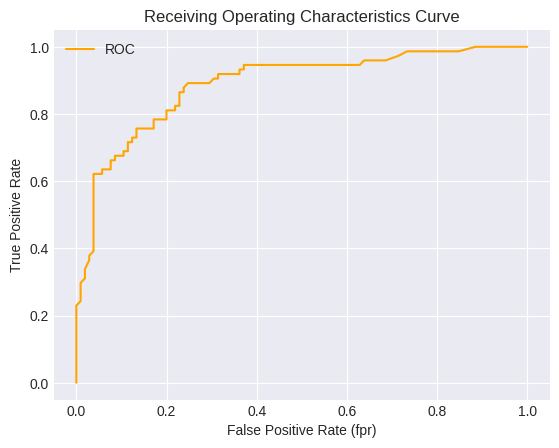

In [135]:
# Create a function for plotting the roc_curve
def plot_roc_curve(fpr, tpr):
    '''
    Plotting the roc curve by entering the false positive rate and true positive rate of the actual label
    and predicted probabilites of the model.
    '''

    # Plot roc curve
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC');

    # Customize the plot
    plt.title('Receiving Operating Characteristics Curve')
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate')
    plt.legend()

plot_roc_curve(fpr, tpr)

In [136]:
# roc_auc_score
roc_auc_score(y_val, y_val_probs_positive)

0.8882239382239382

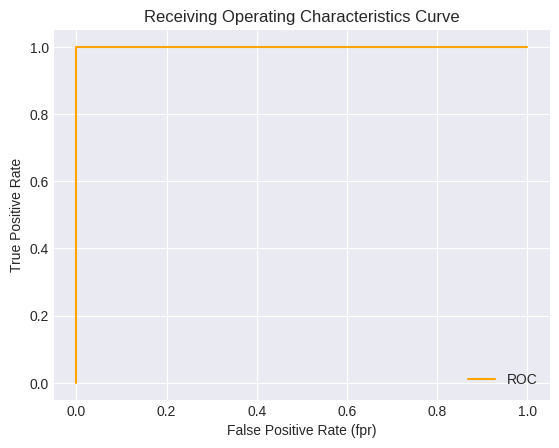

In [137]:
# Perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val)
plot_roc_curve(fpr, tpr)

In [138]:
roc_auc_score(y_val, y_val)

1.0

### 5.2.3 Using the Scoring Parameter in Cross Val Score

In [139]:
# Instantiate
clf_svc = LinearSVC(random_state=42)

# Fit the model
clf_svc.fit(X_train, y_train)

LinearSVC(random_state=42)

In [140]:
# Setup random seed
np.random.seed(42)

# Cross val score, accuracy
cv_acc = cross_val_score(clf_svc,
                         X_train,
                         y_train,
                         cv = 5,
                         scoring = None) # None means it will use the estimators score()

# Print cross validated accuracy
print(f'The cross validated accuracy is:{np.mean(cv_acc) * 100:.2f}%')

The cross validated accuracy is:81.32%


In [141]:
# Cross val score for precision

# Setup random seed
np.random.seed(42)

# cross val score, precision
cv_prec = cross_val_score(clf_svc,
                          X_train,
                          y_train,
                          cv = 5,
                          scoring = 'precision')

# Print cross validated precision
print(f'The cross validated precision is:{np.mean(cv_prec) * 100:.2f}%')

The cross validated precision is:77.14%


In [142]:
# Cross va score for recall

# Setup random seed
np.random.seed(42)

# cross val score, recall
cv_recall = cross_val_score(clf_svc,
                            X_train,
                            y_train,
                            cv = 5,
                            scoring = 'recall')

# print cross validated recall
print(f'The cross validated recall is:{np.mean(cv_recall) * 100:.2f}%')

The cross validated recall is:71.61%


## 5.3 Using different evaluation metrics as sklearn functions

This is an another way of evaluating your machine learning model and the resource link can be found here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [143]:
# Already imported the necessary evaluation scikit-learn tools

# Instantiate
clf_svc = LinearSVC(random_state=42)

# Fit the classifier to the training data
clf_svc.fit(X_train, y_train)

# Make predictions on the validation data
y_val_preds = clf_svc.predict(X_val)

# Print the evaluation metrics
print(f'Accuracy Score:{accuracy_score(y_val, y_val_preds) * 100:.2f}%')
print(f'Precision Score:{precision_score(y_val, y_val_preds) * 100:.2f}%')
print(f'Recall Score:{recall_score(y_val, y_val_preds) :.2f}')
print(f'F1-Score:{f1_score(y_val, y_val_preds)}')

Accuracy Score:83.24%
Precision Score:82.35%
Recall Score:0.76
F1-Score:0.7887323943661971


## 6.0 Hyperparameter Tuning (Improving) The Model

There are generally 3 ways to tune the model:
1) Hyperparameter tuning by hand
2) Randomly by RandomizedSearchCV
3) Exhaustively by GridSearchCV

We will use the `GridSearchCV()` for better tuning and evaluations on the model  

In [144]:
# Get the parameters for the random forest classifier model
clf_svc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

These are the list of hyperparameters that can be used to adjust and implemented in the `GridSearchCV()` method

In [145]:
# First we will make a function that will evaluate the predictions with the model metrics
def evaluate_preds(y_true, y_preds):
    '''
    Creating a predicted evaluation between y_true (y_val) with the y_preds (y_val_preds) using the scikit-learn model
    evaluation metrics.
    '''
    # Define the evaluation metrics
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metric_dict = {
        ' accuracy' : round(accuracy, 2),
        'precision' : round(precision, 2),
        'recall' : round(recall, 2),
        'f1' : round(f1, 2)
    }
    # Print the evaluation metrics
    print(f'Acc:{accuracy * 100:.2f}%')
    print(f'Precision:{precision:.2f}')
    print(f'Recall:{recall :.2f}')
    print(f'F1:{f1 :.2f}')

    return metric_dict

In [147]:
# Make baseline predictions

# Instantiate
clf_svc = LinearSVC(random_state=42)

# Fit the model on the training data
clf_svc.fit(X_train, y_train)

# Make baseline predictions on validation data
y_val_preds = clf_svc.predict(X_val)

# Evaluate the predictions
baseline_metrics = evaluate_preds(y_val, y_val_preds)
baseline_metrics

Acc:83.24%
Precision:0.82
Recall:0.76
F1:0.79


{' accuracy': 0.83, 'precision': 0.82, 'recall': 0.76, 'f1': 0.79}

In [153]:
# Get the parameters
clf_svc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [162]:
# Create a dictionary of the parameters for grid search cv
gs_grid = {'C': [1.0],
 'class_weight': [None],
 'dual': [True],
 'fit_intercept': [True],
 'intercept_scaling': [1],
 'loss': ['squared_hinge'],
 'max_iter': [1000],
 'multi_class': ['ovr'],
 'penalty': ['l2'],
 'random_state': [42],
 'tol': [0.0001],
 'verbose': [0]}

In [163]:
# Now use the classifier grid in the grid search cv that is already imported
# Instantiate
clf_svc = LinearSVC(random_state=42)

# Use the grid search cv
gs_clf_svc = GridSearchCV(estimator = clf_svc,
                        param_grid = gs_grid,
                        cv = 5,
                        verbose = 2)

# Fit the model on the training data
gs_clf_svc.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=1.0, class_weight=None, dual=True, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, random_state=42, tol=0.0001, verbose=0; total time=   0.0s
[CV] END C=1.0, class_weight=None, dual=True, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, random_state=42, tol=0.0001, verbose=0; total time=   0.0s
[CV] END C=1.0, class_weight=None, dual=True, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, random_state=42, tol=0.0001, verbose=0; total time=   0.0s
[CV] END C=1.0, class_weight=None, dual=True, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, random_state=42, tol=0.0001, verbose=0; total time=   0.0s
[CV] END C=1.0, class_weight=None, dual=True, fit_intercept=True, intercept_scaling=1, loss=squared_h

GridSearchCV(cv=5, estimator=LinearSVC(random_state=42),
             param_grid={'C': [1.0], 'class_weight': [None], 'dual': [True],
                         'fit_intercept': [True], 'intercept_scaling': [1],
                         'loss': ['squared_hinge'], 'max_iter': [1000],
                         'multi_class': ['ovr'], 'penalty': ['l2'],
                         'random_state': [42], 'tol': [0.0001],
                         'verbose': [0]},
             verbose=2)

In [164]:
# Find the best hyperparameters
gs_clf_svc.best_params_

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [167]:
# Define X_test
X_test = normalized_passenger_data_test

# Create y_test by making predictions on the X_test
y_test = gs_clf_svc.predict(X_test)

# Predictions on the validation data
y_val_preds = gs_clf_svc.predict(X_val)

gs_clf_svc.score(X_val, y_val_preds)
# Make the evaluation on the test data
gs_metrics = evaluate_preds(y_val, y_val_preds)

Acc:83.24%
Precision:0.82
Recall:0.76
F1:0.79


In [168]:
# score it on the test data
gs_clf_svc.score(X_val, y_val)

0.8324022346368715

Compare the baseline metrics with the grid search metrics

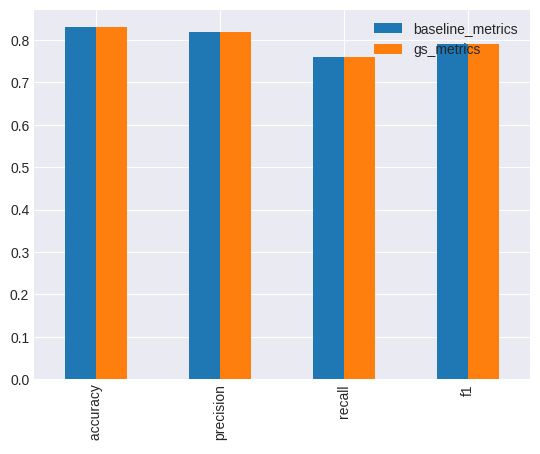

In [169]:
# Make comparisons
compare_metrics = pd.DataFrame({
    'baseline_metrics' : baseline_metrics,
    'gs_metrics' : gs_metrics,
})

compare_metrics.plot(kind = 'bar');

## 6.1 Submission

Put it in the right format. Have PassengerID and the Survived columns

In [172]:
normalized_passenger_data_test

array([[ 1.73399584,  0.82737724,  0.39488658, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.73788372,  0.82737724,  1.35550962, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.74177161, -0.36936484,  2.50825727, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 3.34746731,  0.82737724,  0.70228595, ...,  0.        ,
         1.        ,  0.        ],
       [ 3.35135519,  0.82737724, -0.1046374 , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.35524307,  0.82737724, -0.1046374 , ...,  0.        ,
         0.        ,  0.        ]])

In [173]:
# Create a submission dataframe
submission_project = pd.DataFrame()

# Store the PassengerID from the test data in the dataframe
submission_project['PassengerId'] = passenger_data_test_df_copy['PassengerId']

# Store survived column by making predictions on the transformed test data in the dataframe
submission_project['Survived'] = clf.predict(normalized_passenger_data_test)

# Check it out
submission_project

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 7.0 Save the project

In [175]:
# Export the submission project into a csv file
submission_project.to_csv("submission-project.csv", index = False)